# Exploratory Data Analysis


Relative to the current situation of Public Health in the Philippines, this exploratory data analysis focuses on providing insights and recommendations with the social and health impact of HIV in the Philippines. Data used for this EDA is based on the DHS Program 2017 Philippines. Two datasets will be used for this EDA, as follow: Household dataset, and individual (Eligible women) dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)

In [2]:
#For household dataset
df1 = pd.read_csv('file/PHHR71FL-labeled.csv', dtype = 'unicode')

In [3]:
# importing json dictionary
with open('file/PHHR71FL-data-dictionary.json', 'r') as file:
    df1_col_dict = json.load(file)
df1_col_dict

{'HHID': 'Case Identification',
 'HV000': 'Country code and phase',
 'HV001': 'Cluster number',
 'HV002': 'Household number',
 'HV003': "Respondent's line number (answering Household questionnaire)",
 'HV004': 'Ultimate area unit',
 'HV005': 'Household sample weight (6 decimals)',
 'HV006': 'Month of interview',
 'HV007': 'Year of interview',
 'HV008': 'Date of interview (CMC)',
 'HV008A': 'Date of interview Century Day Code (CDC)',
 'HV009': 'Number of household members',
 'HV010': 'Number of eligible women in household',
 'HV011': 'NA - Number of eligible men in household',
 'HV012': 'Number of de jure members',
 'HV013': 'Number of de facto members',
 'HV014': 'Number of children 5 and under (de jure)',
 'HV015': 'Result of household interview',
 'HV016': 'Day of interview',
 'HV017': 'Number of visits',
 'HV018': 'Interviewer identification',
 'HV019': 'NA - Keyer identification',
 'HV020': 'Ever-married sample',
 'HV021': 'Primary sampling unit',
 'HV022': 'Sample strata for sampl

In [4]:
#check file size
df1.shape

(27496, 2472)

In [5]:
#check columns
df1.columns

Index(['HHID', 'HV000', 'HV001', 'HV002', 'HV003', 'HV004', 'HV005', 'HV006',
       'HV007', 'HV008',
       ...
       'SH233X$1', 'SH233X$2', 'SH233X$3', 'SH233X$4', 'SH233X$5', 'SH233Z$1',
       'SH233Z$2', 'SH233Z$3', 'SH233Z$4', 'SH233Z$5'],
      dtype='object', length=2472)

In [6]:
df1.head()

HHID HV000 HV001 HV002 HV003 HV004     HV005 HV006   HV007   HV008  \
0      00010001   PH7   1.0   1.0   1.0   1.0  364301.0   8.0  2017.0  1412.0   
1      00010002   PH7   1.0   2.0   4.0   1.0  364301.0   8.0  2017.0  1412.0   
2      00010004   PH7   1.0   4.0   2.0   1.0  364301.0   8.0  2017.0  1412.0   
3      00010007   PH7   1.0   7.0   2.0   1.0  364301.0   8.0  2017.0  1412.0   
4      00010008   PH7   1.0   8.0   1.0   1.0  364301.0   8.0  2017.0  1412.0   

    HV008A HV009 HV010 HV011 HV012 HV013 HV014      HV015 HV016 HV017   HV018  \
0  42961.0   8.0   2.0   NaN   8.0   8.0   1.0  Completed  14.0   1.0  8300.0   
1  42964.0   5.0   2.0   NaN   5.0   5.0   1.0  Completed  17.0   1.0  8303.0   
2  42963.0   4.0   1.0   NaN   4.0   4.0   0.0  Completed  16.0   1.0  8303.0   
3  42962.0   5.0   1.0   NaN   5.0   5.0   2.0  Completed  15.0   1.0  8302.0   
4  42961.0  11.0   0.0   NaN  11.0   9.0   0.0  Completed  14.0   1.0  8303.0   

  HV019             HV020 HV021    HV022        HV023  \
0   NaN  All woman sample   1.0  BASILAN  BUCAY, ABRA   
1   NaN  All woman sample   1.0  BASILAN  BUCAY, ABRA   
2   NaN  All woman sample   1.0  BASILAN  BUCAY, ABRA   
3   NaN  All woman sample   1.0  BASILAN  BUCAY, ABRA   
4   NaN  All woman sample   1.0  BASILAN  BUCAY, ABRA   

                                  HV024  HV025 HV026         HV027 HV028  \
0  Autonomous Region in Muslim Mindanao  Rural   NaN  Not selected   0.0   
1  Autonomous Region in Muslim Mindanao  Rural   NaN  Not selected   0.0   
2  Autonomous Region in Muslim Mindanao  Rural   NaN  Not selected   0.0   
3  Autonomous Region in Muslim Mindanao  Rural   NaN  Not selected   0.0   
4  Autonomous Region in Muslim Mindanao  Rural   NaN  Not selected   0.0   

    HV030 HV031 HV032 HV035 HV040 HV041         HV042               HV044  \
0  8300.0   NaN   NaN   NaN   NaN   NaN  Not selected  Household selected   
1  8300.0   NaN   NaN   NaN   NaN   NaN  Not selected  Household selected   
2  8300.0   NaN   NaN   NaN   NaN   NaN  Not selected  Household selected   
3  8300.0   NaN   NaN   NaN   NaN   NaN  Not selected  Household selected   
4  8300.0   NaN   NaN   NaN   NaN   NaN  Not selected  Household selected   

    HV045A   HV045B   HV045C HV046   HV801   HV802 HV803 HV804 HV807D HV807M  \
0  Tagalog  Tagalog    Yakan    No  1448.0  1527.0  39.0   NaN    NaN    NaN   
1  Tagalog  Tagalog   Ivatan    No  1017.0  1045.0  28.0   NaN    NaN    NaN   
2  Tagalog  Tagalog  Maranao    No  1455.0  1513.0  18.0   NaN    NaN    NaN   
3  Tagalog  Tagalog   Tausog    No   911.0   937.0  26.0   NaN    NaN    NaN   
4  Tagalog  Tagalog   Tausog   Yes  1432.0  1510.0  38.0   NaN    NaN    NaN   

  HV807Y HV807C HV807A                HV201                HV202  \
0    NaN    NaN    NaN  Piped into dwelling                  NaN   
1    NaN    NaN    NaN        Bottled water  Piped into dwelling   
2    NaN    NaN    NaN        Bottled water  Piped into dwelling   
3    NaN    NaN    NaN    Piped to neighbor                  NaN   
4    NaN    NaN    NaN  Piped into dwelling                  NaN   

                               HV201A        HV204                 HV205  \
0  No, not interrupted for a full day  On premises  Flush to septic tank   
1  No, not interrupted for a full day  On premises  Flush to septic tank   
2  No, not interrupted for a full day  On premises  Flush to septic tank   
3                          Don't know  On premises  Flush to septic tank   
4  No, not interrupted for a full day  On premises     Composting toilet   

  HV206 HV207 HV208 HV209 HV210 HV211 HV212          HV213  \
0   Yes   Yes   Yes   Yes   Yes   Yes   Yes  Ceramic tiles   
1   Yes    No   Yes   Yes   Yes   Yes   Yes  Ceramic tiles   
2   Yes    No   Yes    No    No    No    No         Cement   
3   Yes    No    No    No    No    No    No    Wood planks   
4   Yes    No   Yes    No   Yes    No    No    Wood planks   

                    HV214                        HV215

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27496 entries, 0 to 27495
Columns: 2472 entries, HHID to SH233Z$5
dtypes: object(2472)
memory usage: 518.6+ MB


In [8]:
#drop null values
df1.dropna(axis=1, how = "all", inplace = True)

In [9]:
df1.shape

(27496, 1639)

In [10]:
df1.isna().sum()

HHID              0
HV000             0
HV001             0
HV002             0
HV003             0
HV004             0
HV005             0
HV006             0
HV007             0
HV008             0
HV008A            0
HV009             0
HV010             0
HV012             0
HV013             0
HV014             0
HV015             0
HV016             0
HV017             0
HV018             0
HV020             0
HV021             0
HV022             0
HV023             0
HV024             0
HV025             0
HV027             0
HV028             0
HV030             0
HV042             0
HV044             0
HV045A            0
HV045B            0
HV045C            0
HV046             0
HV801             0
HV802             0
HV803             0
HV201             0
HV202         17874
HV201A         6589
HV204             0
HV205             0
HV206             0
HV207             0
HV208             0
HV209             0
HV210             0
HV211             0
HV212             0


In [11]:
df1 = df1.loc[:,~df1.columns.str.contains('\$')]

In [12]:
#check new shape/size of dataframe
df1.shape

(27496, 338)

In [13]:
# change the dtypes of columns HHID, HV001, HV002, HV003 & HV004
col_dtype = ['HHID', 'HV001', 'HV002', 'HV003', 'HV004']
for col in col_dtype:
    df1[col] = df1[col].astype('category')

#check HHID, HV001, HV002, HV003 & HV004 if dtypes are already changed
df1[['HHID', 'HV001', 'HV002', 'HV003', 'HV004']].dtypes

HHID     category
HV001    category
HV002    category
HV003    category
HV004    category
dtype: object

In [14]:
#check for duplicated rows
df1[df1.duplicated(keep = False)]

Empty DataFrame
Columns: [HHID, HV000, HV001, HV002, HV003, HV004, HV005, HV006, HV007, HV008, HV008A, HV009, HV010, HV012, HV013, HV014, HV015, HV016, HV017, HV018, HV020, HV021, HV022, HV023, HV024, HV025, HV027, HV028, HV030, HV042, HV044, HV045A, HV045B, HV045C, HV046, HV801, HV802, HV803, HV201, HV202, HV201A, HV204, HV205, HV206, HV207, HV208, HV209, HV210, HV211, HV212, HV213, HV214, HV215, HV216, HV217, HV218, HV219, HV220, HV221, HV225, HV226, HV230A, HV230B, HV232, HV232B, HV232Y, HV235, HV237, HV237A, HV237B, HV237C, HV237D, HV237E, HV237F, HV237X, HV237Z, HV238, HV238A, HV241, HV242, HV243A, HV243B, HV243C, HV243D, HV243E, HV244, HV245, HV246, HV246A, HV246B, HV246C, HV246D, HV246E, HV246F, HV246G, HV252, HV270, HV271, HV270A, HV271A, ...]
Index: []

In [15]:
#for Eligible Women dataset
df2 = pd.read_csv('file/PHIR71FL-labeled.csv', dtype = 'unicode')

In [16]:
#load json dictionary
with open('file/PHIR71FL-data-dictionary.json', 'r') as file:
    df2_col_dict = json.load(file)
df2_col_dict

{'CASEID': 'Case Identification',
 'V000': 'Country code and phase',
 'V001': 'Cluster number',
 'V002': 'Household number',
 'V003': "Respondent's line number",
 'V004': 'Ultimate area unit',
 'V005': "Women's individual sample weight (6 decimals)",
 'V006': 'Month of interview',
 'V007': 'Year of interview',
 'V008': 'Date of interview (CMC)',
 'V008A': 'Date of interview Century Day Code (CDC)',
 'V009': "Respondent's month of birth",
 'V010': "Respondent's year of birth",
 'V011': 'Date of birth (CMC)',
 'V012': "Respondent's current age",
 'V013': 'Age in 5-year groups',
 'V014': 'Completeness of age information',
 'V015': 'Result of individual interview',
 'V016': 'Day of interview',
 'V017': 'NA - CMC start of calendar',
 'V018': 'Row of month of interview',
 'V019': 'Length of calendar',
 'V019A': 'Number of calendar columns',
 'V020': 'Ever-married sample',
 'V021': 'Primary sampling unit',
 'V022': 'Sample strata for sampling errors',
 'V024': 'Region',
 'V025': 'Type of plac

In [17]:
df2.shape

(25074, 5731)

In [18]:
df2.columns

Index(['CASEID', 'V000', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008',
       ...
       'SPREGOUT$11', 'SPREGOUT$12', 'SPREGOUT$13', 'SPREGOUT$14',
       'SPREGOUT$15', 'SPREGOUT$16', 'SPREGOUT$17', 'SPREGOUT$18',
       'SPREGOUT$19', 'SPREGOUT$20'],
      dtype='object', length=5731)

In [19]:
df2.head()

CASEID V000 V001 V002 V003 V004      V005 V006    V007    V008  \
0      00010001  2  PH7  1.0  1.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
1      00010001  7  PH7  1.0  1.0  7.0  1.0  361799.0  8.0  2017.0  1412.0   
2      00010002  4  PH7  1.0  2.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
3      00010004  2  PH7  1.0  4.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
4      00010007  2  PH7  1.0  7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   

     V008A V009    V010    V011  V012   V013  \
0  42962.0  4.0  1986.0  1036.0  31.0  30-34   
1  42962.0  1.0  2002.0  1225.0  15.0  15-19   
2  42964.0  8.0  1984.0  1016.0  33.0  30-34   
3  42963.0  9.0  1972.0   873.0  44.0  40-44   
4  42962.0  6.0  1987.0  1050.0  30.0  30-34   

                                    V014       V015  V016 V017         V018  \
0  Month and year - information complete  Completed  15.0  NaN  No calendar   
1  Month and year - information complete  Completed  15.0  NaN  No calendar   
2  Month and year - information complete  Completed  17.0  NaN  No calendar   
3  Month and year - information complete  Completed  16.0  NaN  No calendar   
4  Month and year - information complete  Completed  15.0  NaN  No calendar   

          V019        V019A              V020 V021     V022  \
0  No calendar  No calendar  All woman sample  1.0  BASILAN   
1  No calendar  No calendar  All woman sample  1.0  BASILAN   
2  No calendar  No calendar  All woman sample  1.0  BASILAN   
3  No calendar  No calendar  All woman sample  1.0  BASILAN   
4  No calendar  No calendar  All woman sample  1.0  BASILAN   

                                   V024   V025 V026 V027    V028 V029    V030  \
0  Autonomous Region in Muslim Mindanao  Rural  NaN  2.0  8300.0  NaN  8300.0   
1  Autonomous Region in Muslim Mindanao  Rural  NaN  1.0  8300.0  NaN  8300.0   
2  Autonomous Region in Muslim Mindanao  Rural  NaN  1.0  8303.0  NaN  8300.0   
3  Autonomous Region in Muslim Mindanao  Rural  NaN  1.0  8303.0  NaN  8300.0   
4  Autonomous Region in Muslim Mindanao  Rural  NaN  1.0  8302.0  NaN  8300.0   

  V031 V032 V034 V040          V042                            V044    V045A  \
0  NaN  NaN  1.0  NaN  Not selected  Woman selected and interviewed  Tagalog   
1  NaN  NaN  NaN  NaN  Not selected              Woman not selected  Tagalog   
2  NaN  NaN  3.0  NaN  Not selected              Woman not selected  Tagalog   
3  NaN  NaN  1.0  NaN  Not selected  Woman selected and interviewed  Tagalog   
4  NaN  NaN  1.0  NaN  Not selected  Woman selected and interviewed  Tagalog   

     V045B    V045C V046         V023                                  V101  \
0  Tagalog    Yakan   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao   
1  Tagalog    Yakan   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao   
2  Tagalog   Ivatan   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao   
3  Tagalog  Maranao   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao   
4  Tagalog   Tausog   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao   

    V102 V103  V104         V105                                 V105A  \
0  Rural  NaN  10.0         City                   Zamboanga Peninsula   
1  Rural  NaN   0.0  Countryside  Autonomous Region in Muslim Mindanao   
2  Rural  NaN  20.0         City  Autonomous Region in Muslim Mindanao   
3  Rural  NaN   4.0         City  Autonomous Region in Muslim Mindanao   
4  Rural  NaN   0.0         City  Autonomous Region in Muslim Mindanao   

           V106 V107                 V113         V115                  V116  \
0        Higher  2.0  Piped into dwelling  On premises  Flush to septic tank   
1  No education  NaN  Piped into dwelling  On premises  Flush to septic tank   
2        Higher  3.0        Bottled water  On premises  Flush to septic tank   
3       Primary  7.0        Bottled water  On premises  Flush to septic tank   
4     Secondary  2.0    Piped to neighbor  On premises  Flush to septic tank   

  V119 V120 V121 V122 V123 V124

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25074 entries, 0 to 25073
Columns: 5731 entries, CASEID to SPREGOUT$20
dtypes: object(5731)
memory usage: 1.1+ GB


In [21]:
#clean and drop null values
df2.dropna(axis=1 , how = 'all', inplace = True)

In [22]:
df2.shape

(25074, 2929)

In [23]:
df2.isna().sum()

CASEID             0
V000               0
V001               0
V002               0
V003               0
V004               0
V005               0
V006               0
V007               0
V008               0
V008A              0
V009               0
V010               0
V011               0
V012               0
V013               0
V014               0
V015               0
V016               0
V018               0
V019               0
V019A              0
V020               0
V021               0
V022               0
V024               0
V025               0
V027               0
V028               0
V030               0
V034            9629
V042               0
V044               0
V045A              0
V045B              0
V045C              0
V046               0
V023               0
V101               0
V102               0
V104               0
V105           10719
V105A          10820
V106               0
V107             296
V113               0
V115               0
V116         

In [24]:
df2 = df2.iloc[:, ~df2.columns.str.contains('\$')]

In [25]:
#check for new shape
df2.shape

(25074, 494)

## Load the 2 datasets for Merging

In [26]:
hr_df = df1
ir_df = df2

In [27]:
hr_df_dict = df1_col_dict
ir_df_dict = df2_col_dict

In [28]:
hr_df_dict

{'HHID': 'Case Identification',
 'HV000': 'Country code and phase',
 'HV001': 'Cluster number',
 'HV002': 'Household number',
 'HV003': "Respondent's line number (answering Household questionnaire)",
 'HV004': 'Ultimate area unit',
 'HV005': 'Household sample weight (6 decimals)',
 'HV006': 'Month of interview',
 'HV007': 'Year of interview',
 'HV008': 'Date of interview (CMC)',
 'HV008A': 'Date of interview Century Day Code (CDC)',
 'HV009': 'Number of household members',
 'HV010': 'Number of eligible women in household',
 'HV011': 'NA - Number of eligible men in household',
 'HV012': 'Number of de jure members',
 'HV013': 'Number of de facto members',
 'HV014': 'Number of children 5 and under (de jure)',
 'HV015': 'Result of household interview',
 'HV016': 'Day of interview',
 'HV017': 'Number of visits',
 'HV018': 'Interviewer identification',
 'HV019': 'NA - Keyer identification',
 'HV020': 'Ever-married sample',
 'HV021': 'Primary sampling unit',
 'HV022': 'Sample strata for sampl

In [29]:
ir_df_dict

{'CASEID': 'Case Identification',
 'V000': 'Country code and phase',
 'V001': 'Cluster number',
 'V002': 'Household number',
 'V003': "Respondent's line number",
 'V004': 'Ultimate area unit',
 'V005': "Women's individual sample weight (6 decimals)",
 'V006': 'Month of interview',
 'V007': 'Year of interview',
 'V008': 'Date of interview (CMC)',
 'V008A': 'Date of interview Century Day Code (CDC)',
 'V009': "Respondent's month of birth",
 'V010': "Respondent's year of birth",
 'V011': 'Date of birth (CMC)',
 'V012': "Respondent's current age",
 'V013': 'Age in 5-year groups',
 'V014': 'Completeness of age information',
 'V015': 'Result of individual interview',
 'V016': 'Day of interview',
 'V017': 'NA - CMC start of calendar',
 'V018': 'Row of month of interview',
 'V019': 'Length of calendar',
 'V019A': 'Number of calendar columns',
 'V020': 'Ever-married sample',
 'V021': 'Primary sampling unit',
 'V022': 'Sample strata for sampling errors',
 'V024': 'Region',
 'V025': 'Type of plac

### Merge both Datasets

In [30]:
print(hr_df.shape)
print(hr_df.columns)

(27496, 338)
Index(['HHID', 'HV000', 'HV001', 'HV002', 'HV003', 'HV004', 'HV005', 'HV006',
       'HV007', 'HV008',
       ...
       'SH512D', 'SH512E', 'SH512F', 'SH512G', 'SH512X', 'SH512Z', 'SH513',
       'SH514', 'SH515', 'SHNUMDV'],
      dtype='object', length=338)


In [31]:
print(ir_df.shape)
print(ir_df.columns)

(25074, 494)
Index(['CASEID', 'V000', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008',
       ...
       'S717', 'S723', 'S815E', 'S904L', 'S933', 'S1107A', 'S1107B', 'SEDUC',
       'SPROV', 'SPEDUC'],
      dtype='object', length=494)


We can use Cluster number and Household number as reference for merging, as per DHS program recommendation when merging both data sets. 

In [32]:
#from hr_df, Cluster Number HV001 and household Number HV002 
print('HV001 unique values:', hr_df['HV001'].nunique())
print('HV002 unique values:', hr_df['HV002'].nunique())

HV001 unique values: 1249
HV002 unique values: 59


In [33]:
#unique combination of cluster and household for hr_df
len(hr_df[['HV001', 'HV002']].drop_duplicates(keep = 'first'))

27496

In [34]:
#from ir_df, Cluster Number V001 and household Number V002 
print('V001 unique values:', ir_df['V001'].nunique())
print('V002 unique values:', ir_df['V002'].nunique())

V001 unique values: 1248
V002 unique values: 53


In [35]:
#unique combination of cluster and household for hr_df
len(ir_df[['V001', 'V002']].drop_duplicates(keep = 'first'))

18644

In [36]:
merged_df = ir_df.merge(hr_df, how = 'left', left_on= ['V001', 'V002'],\
                        right_on = ['HV001', 'HV002'] )
merged_df.head()

CASEID V000 V001 V002 V003 V004      V005 V006    V007    V008  \
0      00010001  2  PH7  1.0  1.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
1      00010001  7  PH7  1.0  1.0  7.0  1.0  361799.0  8.0  2017.0  1412.0   
2      00010002  4  PH7  1.0  2.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
3      00010004  2  PH7  1.0  4.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
4      00010007  2  PH7  1.0  7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   

     V008A V009    V010    V011  V012   V013  \
0  42962.0  4.0  1986.0  1036.0  31.0  30-34   
1  42962.0  1.0  2002.0  1225.0  15.0  15-19   
2  42964.0  8.0  1984.0  1016.0  33.0  30-34   
3  42963.0  9.0  1972.0   873.0  44.0  40-44   
4  42962.0  6.0  1987.0  1050.0  30.0  30-34   

                                    V014       V015  V016         V018  \
0  Month and year - information complete  Completed  15.0  No calendar   
1  Month and year - information complete  Completed  15.0  No calendar   
2  Month and year - information complete  Completed  17.0  No calendar   
3  Month and year - information complete  Completed  16.0  No calendar   
4  Month and year - information complete  Completed  15.0  No calendar   

          V019        V019A              V020 V021     V022  \
0  No calendar  No calendar  All woman sample  1.0  BASILAN   
1  No calendar  No calendar  All woman sample  1.0  BASILAN   
2  No calendar  No calendar  All woman sample  1.0  BASILAN   
3  No calendar  No calendar  All woman sample  1.0  BASILAN   
4  No calendar  No calendar  All woman sample  1.0  BASILAN   

                                   V024   V025 V027    V028    V030 V034  \
0  Autonomous Region in Muslim Mindanao  Rural  2.0  8300.0  8300.0  1.0   
1  Autonomous Region in Muslim Mindanao  Rural  1.0  8300.0  8300.0  NaN   
2  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  3.0   
3  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  1.0   
4  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   

           V042                            V044    V045A    V045B    V045C  \
0  Not selected  Woman selected and interviewed  Tagalog  Tagalog    Yakan   
1  Not selected              Woman not selected  Tagalog  Tagalog    Yakan   
2  Not selected              Woman not selected  Tagalog  Tagalog   Ivatan   
3  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Maranao   
4  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Tausog   

  V046         V023                                  V101   V102  V104  \
0   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  10.0   
1   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0   
2   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  20.0   
3   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   4.0   
4   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0   

          V105                                 V105A          V106 V107  \
0         City                   Zamboanga Peninsula        Higher  2.0   
1  Countryside  Autonomous Region in Muslim Mindanao  No education  NaN   
2         City  Autonomous Region in Muslim Mindanao        Higher  3.0   
3         City  Autonomous Region in Muslim Mindanao       Primary  7.0   
4         City  Autonomous Region in Muslim Mindanao     Secondary  2.0   

                  V113         V115                  V116 V119 V120 V121 V122  \
0  Piped into dwelling  On premises  Flush to septic tank  Yes  Yes  Yes  Yes   
1  Piped into dwelling  On premises  Flush to septic tank  Yes  Yes  Yes  Yes   
2        Bottled water  On premises  Flush to septic tank  Yes   No  Yes  Yes   
3        Bottled water  On premises  Flush to septic tank  Yes   No  Yes   No   
4    Piped to neighbor  On premises  Flush to septic tank  Yes   No   No   No   

  V123 V124 V125           V127                    V128  \
0  Yes  Yes  Yes  Ceramic tiles                  Cement   
1  

In [37]:
# Check the columns of the merged dataset
merged_df.columns

Index(['CASEID', 'V000', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008',
       ...
       'SH512D', 'SH512E', 'SH512F', 'SH512G', 'SH512X', 'SH512Z', 'SH513',
       'SH514', 'SH515', 'SHNUMDV'],
      dtype='object', length=832)

In [38]:
merged_df.shape

(25074, 832)

### Data Visualization and EDA

#### Columns related to HIV and HIV awareness

##### 1. Respondent's knowledge about HIV

V754CP: Reduce risk of getting HIV: always use condoms during sex

V754DP: Reduce risk of getting HIV: have 1 sex partner only, who has no other partners

V754JP: Can get HIV from mosquito bites

V754WP: Can get HIV by sharing food with person who has AIDS

V756: A healthy looking person can have HIV

V750: Ever heard of a Sexually Transmitted Infection (STI)

V751: Ever heard of AIDS

V774A: HIV transmitted during pregnancy

V774B: HIV transmitted during delivery

V774C: HIV transmitted by breastfeeding

##### 2. Based on Respondents' and Partner's Behavior

V822: Wife justified asking husband to use condom if he has STI

V826A: Months ago most recent HIV test

V828: Received result from last HIV test

##### 3. Awareness from LGU

SH301E: LGU Health programs you are  aware of - Free test screening for diseases (example cancer, hiv, etc)

SH302E: Which programs initiated by your LGU or barangay avail in the past 30 days - Free test screening for diseases 
(example cancer, hiv, etc)

##### 4. Stigma 

V777A: Would be ashamed if someone in the family had HIV

V781: Ever been tested for HIV

V783: Know a place to get HIV test

V857A: Children with HIV should be allowed to attend school with children without HIV

V857B: People hesitate to take HIV test because reaction of other people if positive

V857C: People talk badly about people with or believed to have HIV

V857D: People with or believed to have HIV lose respect from other people

V858: Would be afraid to get HIV from contact with saliva from infected person

V823: Can get AIDS by hugging or shaking hands with an infected person

V825: Would buy vegetables from vendor with HIV


(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, "Don't know")])

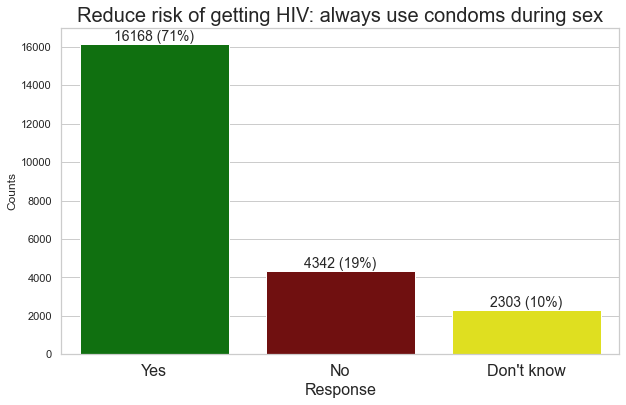

In [39]:
#V754CP: Reduce risk of getting HIV: always use condoms during sex

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V754CP', data=merged_df, palette = ['Green', 'Maroon', 'Yellow'])
ax.set_title('Reduce risk of getting HIV: always use condoms during sex', fontsize=20)
abs_values = merged_df['V754CP'].value_counts(ascending = False).values
rel_values = merged_df['V754CP'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)

ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, "Don't know")])

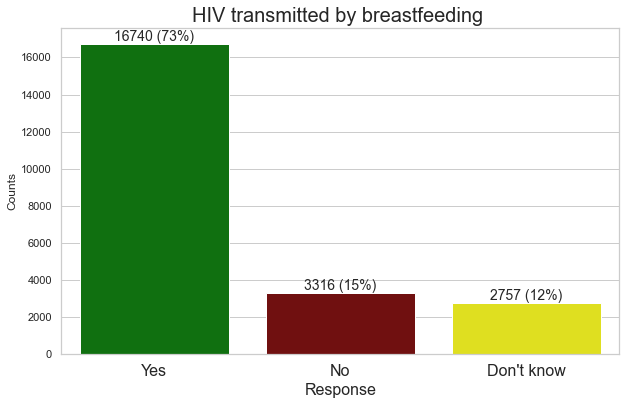

In [40]:
#V774C: HIV transmitted by breastfeeding
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V774C', data=merged_df, order = ['Yes', 'No', 'Don\'t know'], palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V774C'].value_counts(ascending = False).values
rel_values = merged_df['V774C'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('HIV transmitted by breastfeeding ', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, "Don't know")])

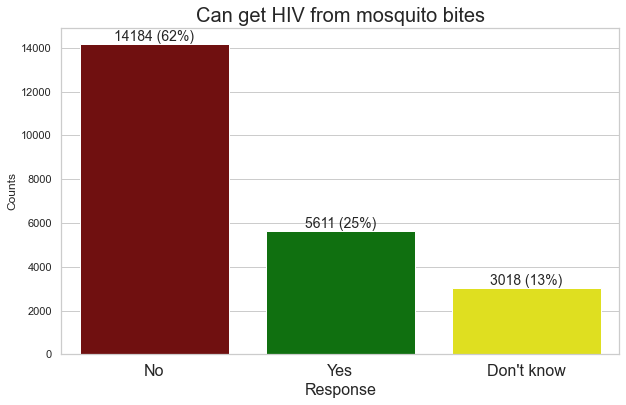

In [41]:
#V754JP: Can get HIV from mosquito bites
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V754JP', data=merged_df,order = merged_df['V754JP'].value_counts().index, palette = ['Maroon', 'Green', 'Yellow'] )
abs_values = merged_df['V754JP'].value_counts(ascending = False).values
rel_values = merged_df['V754JP'].value_counts( ascending = False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0],labels = lbls , fontsize= 14)
ax.set_title('Can get HIV from mosquito bites', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

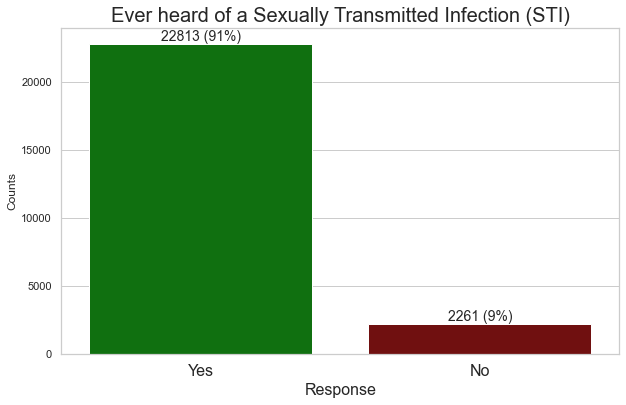

In [42]:
# V750: Ever heard of a Sexually Transmitted Infection (STI)
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V750', data=merged_df, order = ['Yes', 'No'], palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V750'].value_counts(ascending = False).values
rel_values = merged_df['V750'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('Ever heard of a Sexually Transmitted Infection (STI)', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, "Don't know")])

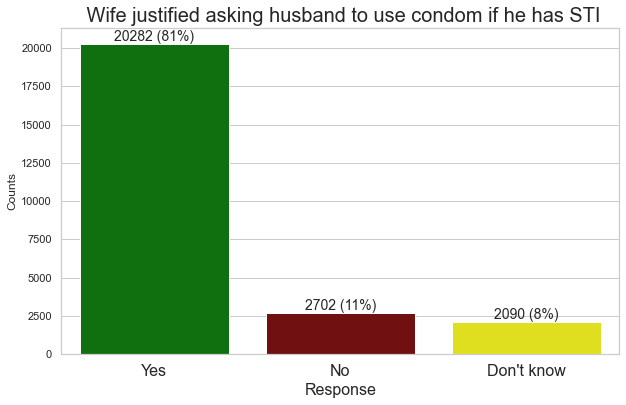

In [43]:
# V822: Wife justified asking husband to use condom if he has STI
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V822', data=merged_df, order = ['Yes', 'No', 'Don\'t know'], palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V822'].value_counts(ascending = False).values
rel_values = merged_df['V822'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' Wife justified asking husband to use condom if he has STI', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

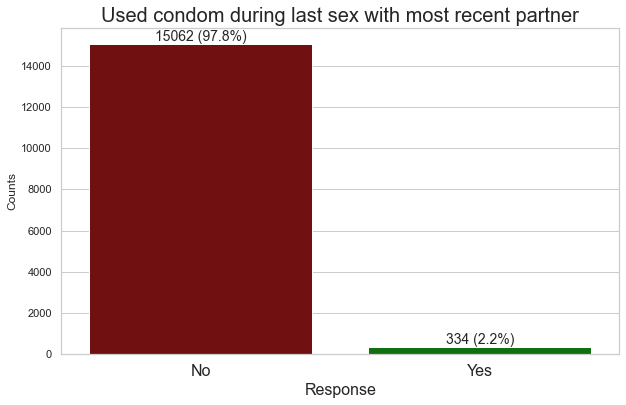

In [44]:
# 761:Condom used during last sex with most recent partner
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V761', data=merged_df, order = ['No', 'Yes'], palette = ['Maroon', 'Green', 'Yellow'] )
abs_values = merged_df['V761'].value_counts(ascending = False).values
rel_values = merged_df['V761'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('Used condom during last sex with most recent partner', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

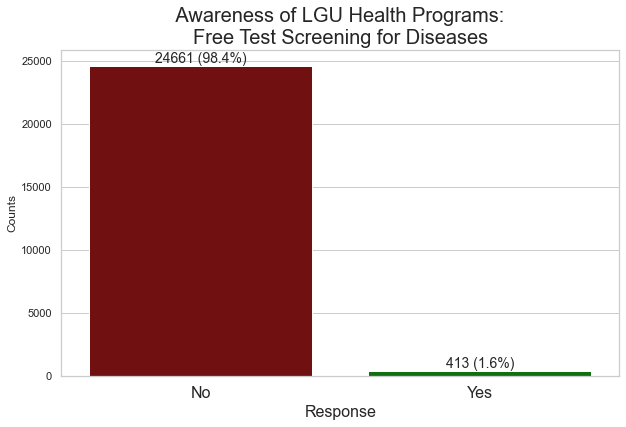

In [45]:
# SH301E: LGU Health programs you are aware of - Free test screening for diseases (example cancer, hiv, etc)
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='SH301E', data=merged_df, order = ['No', 'Yes'], palette = ['Maroon', 'Green', 'Yellow'] )
abs_values = merged_df['SH301E'].value_counts(ascending = False).values
rel_values = merged_df['SH301E'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' Awareness of LGU Health Programs: \nFree Test Screening for Diseases', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

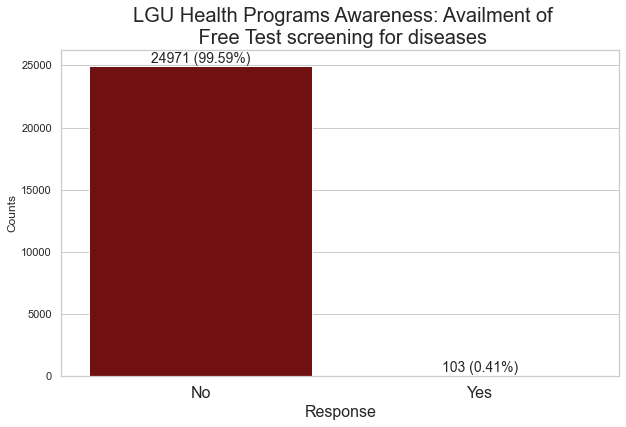

In [46]:
# SH302E: Which programs initiated by your LGU or barangay avail in the past 30 days - Free test screening for diseases (example cancer, hiv, etc)
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='SH302E', data=merged_df, palette = ['Maroon', 'Green'] )
abs_values = merged_df['SH302E'].value_counts(ascending = False).values
rel_values = merged_df['SH302E'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('  LGU Health Programs Awareness: Availment of \n Free Test screening for diseases', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

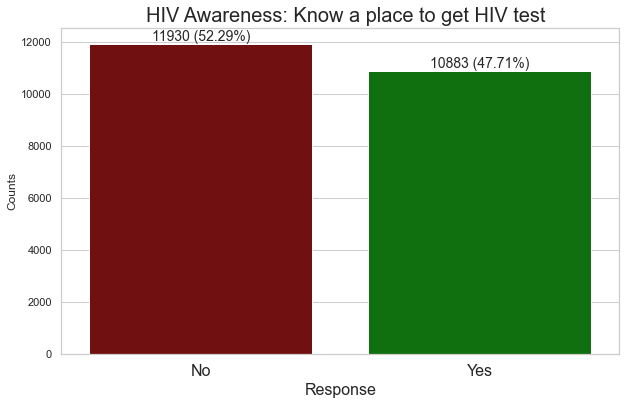

In [47]:
# V783: Know a place to get HIV test

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V783', data=merged_df, palette = ['Maroon', 'Green'] )
abs_values = merged_df['V783'].value_counts(ascending = False).values
rel_values = merged_df['V783'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('  HIV Awareness: Know a place to get HIV test', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

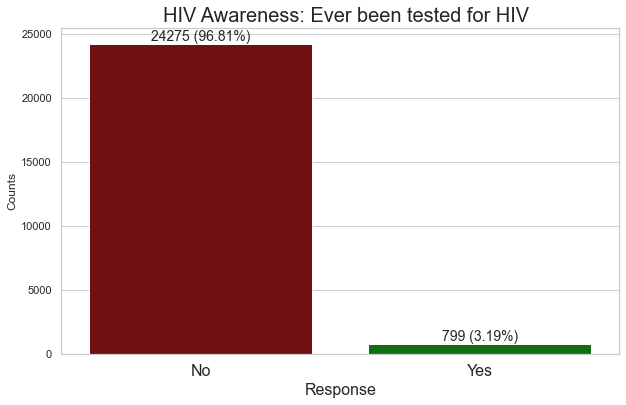

In [48]:
# V781: Ever been tested for HIV

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V781', data=merged_df, palette = ['Maroon', 'Green'] )
abs_values = merged_df['V781'].value_counts(ascending = False).values
rel_values = merged_df['V781'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title('  HIV Awareness: Ever been tested for HIV', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'Disagree'),
  Text(1, 0, 'Agree'),
  Text(2, 0, "Don't know/not sure/depends")])

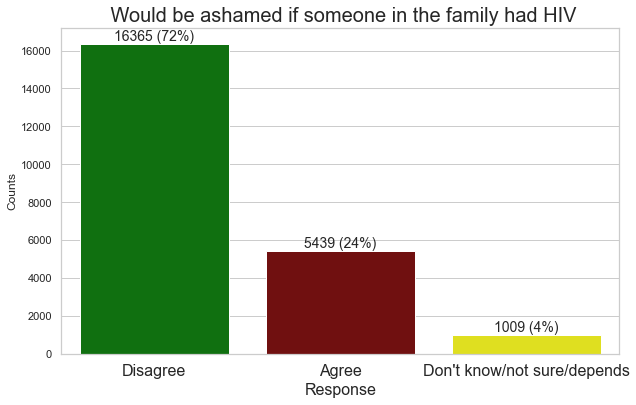

In [49]:
# V777A: Would be ashamed if someone in the family had HIV
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V777A', data=merged_df, order = merged_df['V777A'].value_counts().index, palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V777A'].value_counts(ascending = False).values
rel_values = merged_df['V777A'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' Would be ashamed if someone in the family had HIV', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, "Don't know/not sure/depends")])

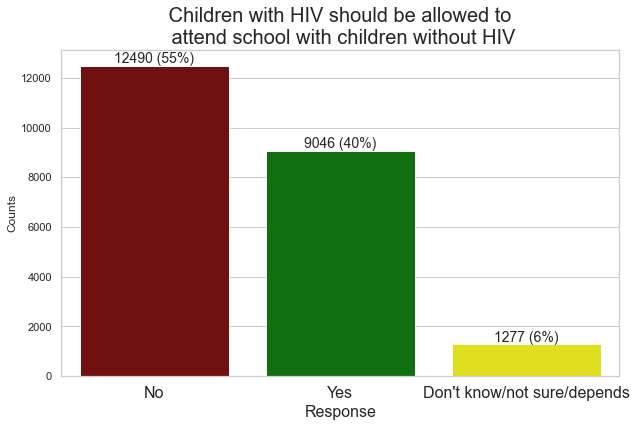

In [50]:
# V857A: Children with HIV should be allowed to attend school with children without HIV

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V857A', data=merged_df, order = merged_df['V857A'].value_counts().index, palette = ['Maroon', 'Green', 'Yellow'] )
abs_values = merged_df['V857A'].value_counts(ascending = False).values
rel_values = merged_df['V857A'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' Children with HIV should be allowed to \n attend school with children without HIV', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'),
  Text(1, 0, 'No'),
  Text(2, 0, "Don't know/not sure/depends")])

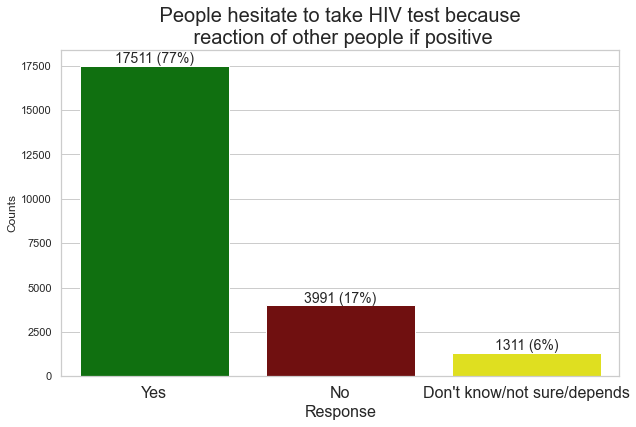

In [51]:
# V857B: People hesitate to take HIV test because reaction of other people if positive

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V857B', data=merged_df, order = merged_df['V857B'].value_counts().index, palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V857B'].value_counts(ascending = False).values
rel_values = merged_df['V857B'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' People hesitate to take HIV test because \n reaction of other people if positive', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'),
  Text(1, 0, 'No'),
  Text(2, 0, "Don't know/not sure/depends")])

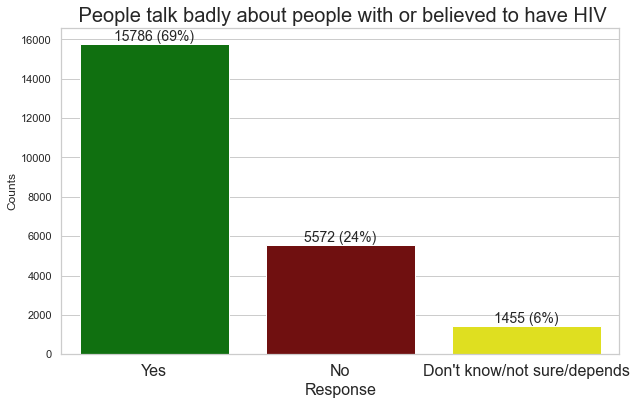

In [52]:
# V857C: People talk badly about people with or believed to have HIV

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='V857C', data=merged_df, order = merged_df['V857C'].value_counts().index, palette = ['Green', 'Maroon', 'Yellow'] )
abs_values = merged_df['V857C'].value_counts(ascending = False).values
rel_values = merged_df['V857C'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)
ax.set_title(' People talk badly about people with or believed to have HIV', fontsize=20)
ax.set_xlabel('Response', fontsize=16)
ax.set_ylabel('Counts')
plt.xticks(size= 16)

In [53]:
# save clean file tocsv
# merged_df.to_csv('merged_clean_data.csv', index = False)

In [54]:
merged_df['SPROV']

0                                                  Basilan
1                                                  Basilan
2                                                  Basilan
3                                                  Basilan
4                                                  Basilan
5                                                  Basilan
6                                                  Basilan
7                                                  Basilan
8                                                  Basilan
9                                                  Basilan
10                                                 Basilan
11                                                 Basilan
12                                                 Basilan
13                                                 Basilan
14                                                 Basilan
15                                                 Basilan
16                                                 Basil

In [55]:

df_recode = {'Isabela City' : 'Basilan',
 'Cotabato City': 'Maguindanao',
 'Caloocan/Malabon/Navotas/Valenzuela': 'Metropolitan Manila: 3rd District',
 'Las Pinas/Makati/Muntinlupa/Paranaque/Pasay/Taguig/Pateros': 'Metropolitan Manila: 4th District',
 'Mandaluyong/Marikina/Pasig/San Juan/Quezon City': 'Metropolitan Manila: 2nd District',
 'Manila': 'Metropolitan Manila: Central District',
 'Cebu (Inc Cities)':'Cebu',
 'Samar (Western)':'Samar',
 'Compostella Valley':'Compostela Valley',
 'Cotabato (North)':'North Cotabato'
}

merged_df['SPROV_'] = merged_df['SPROV'].apply(lambda x: x.title()).replace(df_recode)
merged_df.head()

CASEID V000 V001 V002 V003 V004      V005 V006    V007    V008  \
0      00010001  2  PH7  1.0  1.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
1      00010001  7  PH7  1.0  1.0  7.0  1.0  361799.0  8.0  2017.0  1412.0   
2      00010002  4  PH7  1.0  2.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
3      00010004  2  PH7  1.0  4.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
4      00010007  2  PH7  1.0  7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   

     V008A V009    V010    V011  V012   V013  \
0  42962.0  4.0  1986.0  1036.0  31.0  30-34   
1  42962.0  1.0  2002.0  1225.0  15.0  15-19   
2  42964.0  8.0  1984.0  1016.0  33.0  30-34   
3  42963.0  9.0  1972.0   873.0  44.0  40-44   
4  42962.0  6.0  1987.0  1050.0  30.0  30-34   

                                    V014       V015  V016         V018  \
0  Month and year - information complete  Completed  15.0  No calendar   
1  Month and year - information complete  Completed  15.0  No calendar   
2  Month and year - information complete  Completed  17.0  No calendar   
3  Month and year - information complete  Completed  16.0  No calendar   
4  Month and year - information complete  Completed  15.0  No calendar   

          V019        V019A              V020 V021     V022  \
0  No calendar  No calendar  All woman sample  1.0  BASILAN   
1  No calendar  No calendar  All woman sample  1.0  BASILAN   
2  No calendar  No calendar  All woman sample  1.0  BASILAN   
3  No calendar  No calendar  All woman sample  1.0  BASILAN   
4  No calendar  No calendar  All woman sample  1.0  BASILAN   

                                   V024   V025 V027    V028    V030 V034  \
0  Autonomous Region in Muslim Mindanao  Rural  2.0  8300.0  8300.0  1.0   
1  Autonomous Region in Muslim Mindanao  Rural  1.0  8300.0  8300.0  NaN   
2  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  3.0   
3  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  1.0   
4  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   

           V042                            V044    V045A    V045B    V045C  \
0  Not selected  Woman selected and interviewed  Tagalog  Tagalog    Yakan   
1  Not selected              Woman not selected  Tagalog  Tagalog    Yakan   
2  Not selected              Woman not selected  Tagalog  Tagalog   Ivatan   
3  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Maranao   
4  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Tausog   

  V046         V023                                  V101   V102  V104  \
0   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  10.0   
1   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0   
2   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  20.0   
3   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   4.0   
4   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0   

          V105                                 V105A          V106 V107  \
0         City                   Zamboanga Peninsula        Higher  2.0   
1  Countryside  Autonomous Region in Muslim Mindanao  No education  NaN   
2         City  Autonomous Region in Muslim Mindanao        Higher  3.0   
3         City  Autonomous Region in Muslim Mindanao       Primary  7.0   
4         City  Autonomous Region in Muslim Mindanao     Secondary  2.0   

                  V113         V115                  V116 V119 V120 V121 V122  \
0  Piped into dwelling  On premises  Flush to septic tank  Yes  Yes  Yes  Yes   
1  Piped into dwelling  On premises  Flush to septic tank  Yes  Yes  Yes  Yes   
2        Bottled water  On premises  Flush to septic tank  Yes   No  Yes  Yes   
3        Bottled water  On premises  Flush to septic tank  Yes   No  Yes   No   
4    Piped to neighbor  On premises  Flush to septic tank  Yes   No   No   No   

  V123 V124 V125           V127                    V128  \
0  Yes  Yes  Yes  Ceramic tiles                  Cement   
1  

In [57]:
# V754CP: Reduce risk of getting HIV: always use condoms during sex
# V774C: HIV transmitted by breastfeeding
# V761: Condom used during last sex with most recent partner
# SH301E: LGU Health programs you are aware of - Free test screening for diseases 
# V857B: People hesitate to take HIV test because reaction of other people if positive
# V857A: Children with HIV should be allowed to attend school with children without HIV
feature_cols = ['V754CP', 'V774C', 'V761', 'SH301E', 'V857B', 'V857A', 'SPROV_']
df1 = merged_df.dropna(subset=feature_cols)
cluster_df = df1[feature_cols]
cluster_df.shape
cluster_df1 = cluster_df.copy()

In [58]:
cluster_df1['SPROV_'].unique()

array(['Basilan', 'Lanao Del Sur', 'Maguindanao', 'Sulu', 'Tawi-Tawi',
       'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'Agusan Del Norte', 'Agusan Del Sur',
       'Dinagat Islands', 'Surigao Del Norte', 'Surigao Del Sur',
       'Metropolitan Manila: 3rd District',
       'Metropolitan Manila: 4th District',
       'Metropolitan Manila: 2nd District',
       'Metropolitan Manila: Central District', 'Negros Occidental',
       'Negros Oriental', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
       'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna',
       'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay',
       'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate',
       'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
    

In [59]:
cluster_df['V754CP'].value_counts()

Yes           10300
No             2664
Don't know     1128
Name: V754CP, dtype: int64

In [60]:
cluster_df['V774C'].value_counts()

Yes           10650
No             2037
Don't know     1405
Name: V774C, dtype: int64

In [61]:
cluster_df['V761'].value_counts()

No     13765
Yes      327
Name: V761, dtype: int64

In [62]:
cluster_df['SH301E'].value_counts()

No     13870
Yes      222
Name: SH301E, dtype: int64

In [63]:
cluster_df['V857B'].value_counts()

Yes                            10920
No                              2521
Don't know/not sure/depends      651
Name: V857B, dtype: int64

In [64]:
cluster_df['V857A'].value_counts()

No                             7992
Yes                            5434
Don't know/not sure/depends     666
Name: V857A, dtype: int64

## Label Encoder

In [66]:
# Using the 6 selected features related to HIV Awareness
# V754CP: Reduce risk of getting HIV: always use condoms during sex
# V774C: HIV transmitted by breastfeeding
# V761: Condom used during last sex with most recent partner
# SH301E: LGU Health programs you are aware of - Free test screening for diseases 
# V857B: People hesitate to take HIV test because reaction of other people if positive
# V857A: Children with HIV should be allowed to attend school with children without HIV

In [67]:
#Import label encoder
from sklearn.preprocessing import LabelEncoder

for col in feature_cols:
  mapping = LabelEncoder()
  cluster_df[col + '_'] = mapping.fit_transform(cluster_df[col])

cluster_df.head()

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\2181143236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df[col + '_'] = mapping.fit_transform(cluster_df[col])
C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\2181143236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df[col + '_'] = mapping.fit_transform(cluster_df[col])
C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\2181143236.py:6: SettingWithCopyWarning: 
A value is trying to be set o

V754CP       V774C V761 SH301E                        V857B  \
0    Yes         Yes   No     No                           No   
2    Yes         Yes   No     No                          Yes   
4    Yes  Don't know   No     No  Don't know/not sure/depends   
5    Yes         Yes   No     No  Don't know/not sure/depends   
7    Yes  Don't know   No     No  Don't know/not sure/depends   

                         V857A   SPROV_  V754CP_  V774C_  V761_  SH301E_  \
0                           No  Basilan        2       2      0        0   
2                          Yes  Basilan        2       2      0        0   
4  Don't know/not sure/depends  Basilan        2       0      0        0   
5                          Yes  Basilan        2       2      0        0   
7  Don't know/not sure/depends  Basilan        2       0      0        0   

   V857B_  V857A_  SPROV__  
0       1       1        8  
2       2       2        8  
4       0       0        8  
5       0       2        8  
7       0       0        8

In [68]:
feature_recoded = [col + '_' for col in feature_cols]
feature_recoded

['V754CP_', 'V774C_', 'V761_', 'SH301E_', 'V857B_', 'V857A_', 'SPROV__']

In [69]:
cluster_df1 = cluster_df.copy().drop(columns = feature_recoded, inplace = True)
cluster_df.drop(columns = feature_cols, inplace = True)
cluster_df.head()

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\3635289036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.drop(columns = feature_cols, inplace = True)


V754CP_  V774C_  V761_  SH301E_  V857B_  V857A_  SPROV__
0        2       2      0        0       1       1        8
2        2       2      0        0       2       2        8
4        2       0      0        0       0       0        8
5        2       2      0        0       0       2        8
7        2       0      0        0       0       0        8

## Algorithm

In [70]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X = scaler.fit_transform(cluster_df)

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [72]:
print("Inertia: " + str(kmeans.inertia_))

Inertia: 115.35977267906708


In [73]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_kmeans)
print("Silhouette: " + str(s_score))

Silhouette: 0.5663350033656508


In [74]:
inertia = []
sil = []

# changing the number of clusters 
for k in range(3,10):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

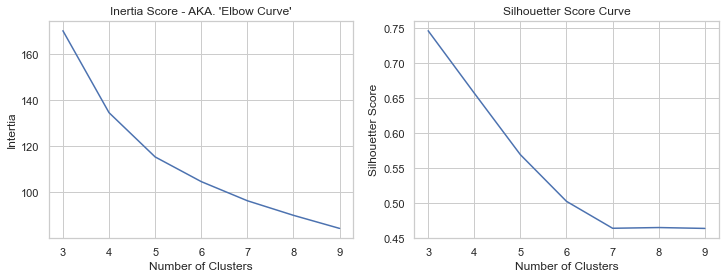

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [76]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

In [79]:
data = cluster_df
data['cluster_labels'] = cluster_labels
df1['cluster_labels'] = cluster_labels
df1.head()

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\1376221871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_labels'] = cluster_labels
C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\1376221871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster_labels'] = cluster_labels


CASEID V000 V001  V002 V003 V004      V005 V006    V007    V008  \
0      00010001  2  PH7  1.0   1.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
2      00010002  4  PH7  1.0   2.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
4      00010007  2  PH7  1.0   7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
5      00010010  2  PH7  1.0  10.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
7      00010013  2  PH7  1.0  13.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   

     V008A  V009    V010    V011  V012   V013  \
0  42962.0   4.0  1986.0  1036.0  31.0  30-34   
2  42964.0   8.0  1984.0  1016.0  33.0  30-34   
4  42962.0   6.0  1987.0  1050.0  30.0  30-34   
5  42962.0   4.0  1977.0   928.0  40.0  40-44   
7  42962.0  11.0  1997.0  1175.0  19.0  15-19   

                                    V014       V015  V016         V018  \
0  Month and year - information complete  Completed  15.0  No calendar   
2  Month and year - information complete  Completed  17.0  No calendar   
4  Month and year - information complete  Completed  15.0  No calendar   
5  Month and year - information complete  Completed  15.0  No calendar   
7  Month and year - information complete  Completed  15.0  No calendar   

          V019        V019A              V020 V021     V022  \
0  No calendar  No calendar  All woman sample  1.0  BASILAN   
2  No calendar  No calendar  All woman sample  1.0  BASILAN   
4  No calendar  No calendar  All woman sample  1.0  BASILAN   
5  No calendar  No calendar  All woman sample  1.0  BASILAN   
7  No calendar  No calendar  All woman sample  1.0  BASILAN   

                                   V024   V025 V027    V028    V030 V034  \
0  Autonomous Region in Muslim Mindanao  Rural  2.0  8300.0  8300.0  1.0   
2  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  3.0   
4  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   
5  Autonomous Region in Muslim Mindanao  Rural  2.0  8302.0  8300.0  1.0   
7  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   

           V042                            V044    V045A    V045B   V045C  \
0  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Yakan   
2  Not selected              Woman not selected  Tagalog  Tagalog  Ivatan   
4  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Tausog   
5  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Tausog   
7  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Yakan   

  V046         V023                                  V101   V102  V104  V105  \
0   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  10.0  City   
2   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  20.0  City   
4   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0  City   
5   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  28.0  City   
7   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   7.0  City   

                                  V105A       V106 V107                 V113  \
0                   Zamboanga Peninsula     Higher  2.0  Piped into dwelling   
2  Autonomous Region in Muslim Mindanao     Higher  3.0        Bottled water   
4  Autonomous Region in Muslim Mindanao  Secondary  2.0    Piped to neighbor   
5  Autonomous Region in Muslim Mindanao  Secondary  4.0  Piped into dwelling   
7  Autonomous Region in Muslim Mindanao    Primary  6.0  Piped into dwelling   

          V115                    V116 V119 V120 V121 V122 V123 V124 V125  \
0  On premises    Flush to septic tank  Yes  Yes  Yes  Yes  Yes  Yes  Yes   
2  On premises    Flush to septic tank  Yes   No  Yes  Yes  Yes  Yes  Yes   
4  On premises    Flush to septic tank  Yes   No   No   No   No   No   No   
5  On premises  Hanging toilet/latrine  Yes   No  Yes   No   No   No   No   
7  On premises    Flush to septic tank  Yes   No   No   No   No  Yes   No   

            V127                    V128                         V129   V

In [80]:
cluster0 = df1[df1['cluster_labels'] == 0]

In [81]:
cluster1 = df1[df1['cluster_labels'] == 1]

In [82]:
cluster2 = df1[df1['cluster_labels'] == 2]

In [83]:
cluster3 = df1[df1['cluster_labels'] == 3]

In [84]:
cluster4 = df1[df1['cluster_labels'] == 4]

In [85]:
df_labeled = df1.copy()

In [86]:
df_labeled.head()

CASEID V000 V001  V002 V003 V004      V005 V006    V007    V008  \
0      00010001  2  PH7  1.0   1.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
2      00010002  4  PH7  1.0   2.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
4      00010007  2  PH7  1.0   7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
5      00010010  2  PH7  1.0  10.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
7      00010013  2  PH7  1.0  13.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   

     V008A  V009    V010    V011  V012   V013  \
0  42962.0   4.0  1986.0  1036.0  31.0  30-34   
2  42964.0   8.0  1984.0  1016.0  33.0  30-34   
4  42962.0   6.0  1987.0  1050.0  30.0  30-34   
5  42962.0   4.0  1977.0   928.0  40.0  40-44   
7  42962.0  11.0  1997.0  1175.0  19.0  15-19   

                                    V014       V015  V016         V018  \
0  Month and year - information complete  Completed  15.0  No calendar   
2  Month and year - information complete  Completed  17.0  No calendar   
4  Month and year - information complete  Completed  15.0  No calendar   
5  Month and year - information complete  Completed  15.0  No calendar   
7  Month and year - information complete  Completed  15.0  No calendar   

          V019        V019A              V020 V021     V022  \
0  No calendar  No calendar  All woman sample  1.0  BASILAN   
2  No calendar  No calendar  All woman sample  1.0  BASILAN   
4  No calendar  No calendar  All woman sample  1.0  BASILAN   
5  No calendar  No calendar  All woman sample  1.0  BASILAN   
7  No calendar  No calendar  All woman sample  1.0  BASILAN   

                                   V024   V025 V027    V028    V030 V034  \
0  Autonomous Region in Muslim Mindanao  Rural  2.0  8300.0  8300.0  1.0   
2  Autonomous Region in Muslim Mindanao  Rural  1.0  8303.0  8300.0  3.0   
4  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   
5  Autonomous Region in Muslim Mindanao  Rural  2.0  8302.0  8300.0  1.0   
7  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   

           V042                            V044    V045A    V045B   V045C  \
0  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Yakan   
2  Not selected              Woman not selected  Tagalog  Tagalog  Ivatan   
4  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Tausog   
5  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Tausog   
7  Not selected  Woman selected and interviewed  Tagalog  Tagalog   Yakan   

  V046         V023                                  V101   V102  V104  V105  \
0   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  10.0  City   
2   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  20.0  City   
4   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   0.0  City   
5   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  28.0  City   
7   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural   7.0  City   

                                  V105A       V106 V107                 V113  \
0                   Zamboanga Peninsula     Higher  2.0  Piped into dwelling   
2  Autonomous Region in Muslim Mindanao     Higher  3.0        Bottled water   
4  Autonomous Region in Muslim Mindanao  Secondary  2.0    Piped to neighbor   
5  Autonomous Region in Muslim Mindanao  Secondary  4.0  Piped into dwelling   
7  Autonomous Region in Muslim Mindanao    Primary  6.0  Piped into dwelling   

          V115                    V116 V119 V120 V121 V122 V123 V124 V125  \
0  On premises    Flush to septic tank  Yes  Yes  Yes  Yes  Yes  Yes  Yes   
2  On premises    Flush to septic tank  Yes   No  Yes  Yes  Yes  Yes  Yes   
4  On premises    Flush to septic tank  Yes   No   No   No   No   No   No   
5  On premises  Hanging toilet/latrine  Yes   No  Yes   No   No   No   No   
7  On premises    Flush to septic tank  Yes   No   No   No   No  Yes   No   

            V127                    V128                         V129   V

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Remove c - color column from df since it's not needed for this visuals
#Drop Cluster labels for now since we don't want to scale its values 
data.drop(columns = ['cluster_labels'], inplace = True)

df_minmax = scaler.fit_transform(data[feature_recoded])
df_minmax = pd.DataFrame(df_minmax, index=data.index, columns=feature_cols)

df_minmax['cluster_labels'] = cluster_labels

df_clusters = df_minmax.set_index("cluster_labels")
df_clusters = df_clusters.groupby("cluster_labels").mean().reset_index().fillna(0)
df_clusters

C:\Users\Raymart L. Perillo\AppData\Local\Temp\ipykernel_23184\451072666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['cluster_labels'], inplace = True)


cluster_labels  V754CP  V774C   V761  SH301E  V857B  V857A  SPROV_
0               0  0.8093 0.8150 0.0229  0.0169 0.8409 0.6574  0.6237
1               1  0.8604 0.9117 0.0313  0.0370 0.9060 0.7051  0.0077
2               2  0.8787 0.8738 0.0098  0.0049 0.9326 0.7181  0.0331
3               3  0.8483 0.8232 0.0228  0.0061 0.9431 0.7428  0.0799
4               4  0.8780 0.8683 0.0261  0.0119 0.9306 0.6874  0.2063

In [88]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('cluster_labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

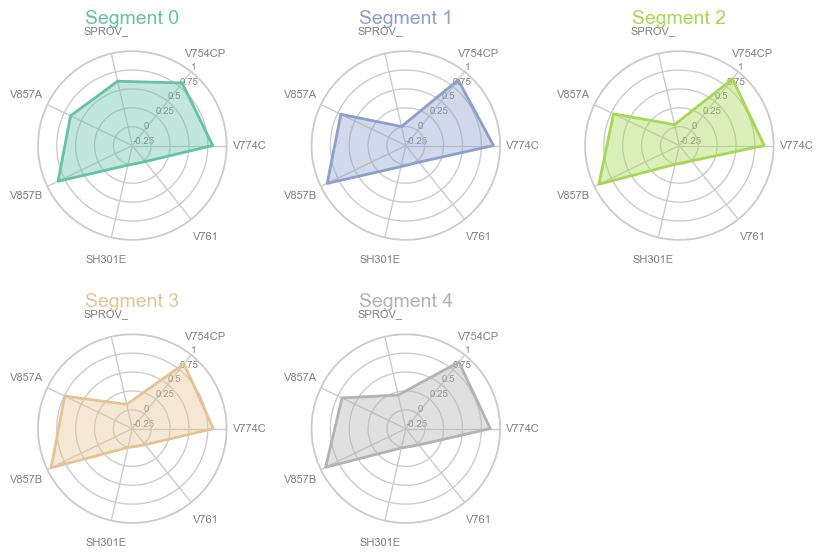

In [89]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['cluster_labels'][row]).astype(str), 
                color=my_palette(row))
    
# plt.savefig('clusters.png')


In [90]:
# V754CP: Reduce risk of getting HIV: always use condoms during sex
# V774C: HIV transmitted by breastfeeding
# V761: Condom used during last sex with most recent partner
# SH301E: LGU Health programs you are aware of - Free test screening for diseases 
# V857B: People hesitate to take HIV test because reaction of other people if positive
# V857A: Children with HIV should be allowed to attend school with children without HIV
cluster0.head()

CASEID V000 V001  V002 V003 V004      V005 V006    V007    V008  \
4       00010007  2  PH7  1.0   7.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
7       00010013  2  PH7  1.0  13.0  2.0  1.0  361799.0  8.0  2017.0  1412.0   
15      00010018  4  PH7  1.0  18.0  4.0  1.0  361799.0  8.0  2017.0  1412.0   
48      00020021  2  PH7  2.0  21.0  2.0  2.0  416591.0  8.0  2017.0  1412.0   
57      00030006  2  PH7  3.0   6.0  2.0  3.0  207861.0  9.0  2017.0  1413.0   

      V008A  V009    V010    V011  V012   V013  \
4   42962.0   6.0  1987.0  1050.0  30.0  30-34   
7   42962.0  11.0  1997.0  1175.0  19.0  15-19   
15  42962.0   7.0  1999.0  1195.0  18.0  15-19   
48  42965.0   3.0  1968.0   819.0  49.0  45-49   
57  43001.0   9.0  1989.0  1077.0  28.0  25-29   

                                     V014       V015  V016         V018  \
4   Month and year - information complete  Completed  15.0  No calendar   
7   Month and year - information complete  Completed  15.0  No calendar   
15  Month and year - information complete  Completed  15.0  No calendar   
48  Month and year - information complete  Completed  18.0  No calendar   
57  Month and year - information complete  Completed  23.0  No calendar   

           V019        V019A              V020 V021     V022  \
4   No calendar  No calendar  All woman sample  1.0  BASILAN   
7   No calendar  No calendar  All woman sample  1.0  BASILAN   
15  No calendar  No calendar  All woman sample  1.0  BASILAN   
48  No calendar  No calendar  All woman sample  2.0  BASILAN   
57  No calendar  No calendar  All woman sample  3.0  BASILAN   

                                    V024   V025 V027    V028    V030 V034  \
4   Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   
7   Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   
15  Autonomous Region in Muslim Mindanao  Rural  1.0  8301.0  8300.0  3.0   
48  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   
57  Autonomous Region in Muslim Mindanao  Rural  1.0  8302.0  8300.0  1.0   

            V042                            V044    V045A    V045B    V045C  \
4   Not selected  Woman selected and interviewed  Tagalog  Tagalog   Tausog   
7   Not selected  Woman selected and interviewed  Tagalog  Tagalog    Yakan   
15  Not selected  Woman selected and interviewed  Tagalog    Yakan    Yakan   
48  Not selected  Woman selected and interviewed  Tagalog  Tagalog  Cebuano   
57  Not selected  Woman selected and interviewed  Tagalog  Tagalog    Yakan   

   V046         V023                                  V101   V102    V104  \
4    No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural     0.0   
7    No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural     7.0   
15   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural     3.0   
48   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural    29.0   
57   No  BUCAY, ABRA  Autonomous Region in Muslim Mindanao  Rural  Always   

    V105                                 V105A       V106  \
4   City  Autonomous Region in Muslim Mindanao  Secondary   
7   City  Autonomous Region in Muslim Mindanao    Primary   
15  City  Autonomous Region in Muslim Mindanao  Secondary   
48  City                   Zamboanga Peninsula    Primary   
57   NaN                                   NaN     Higher   

                                V107                 V113         V115  \
4                                2.0    Piped to neighbor  On premises   
7                                6.0  Piped into dwelling  On premises   
15                               1.0  Piped into dwelling  On premises   
48                               5.0    Piped to neighbor  On premises   
57  No years completed at level V106     Unprotected well  On premises   

                           V116 V119 V120 V121 V122 V123 V124 V125  \
4          Flush to septic tank  Yes   No   No   No   No   No   No   
7          Flush to septic tank  Yes   No 

In [74]:
cluster0['SPROV_'].unique()

array(['Basilan', 'Lanao Del Sur', 'Maguindanao', 'Sulu', 'Tawi-Tawi',
       'Benguet', 'Ifugao', 'Kalinga', 'Mountain Province',
       'Dinagat Islands', 'Surigao Del Norte', 'Surigao Del Sur',
       'Metropolitan Manila: 3rd District',
       'Metropolitan Manila: 4th District',
       'Metropolitan Manila: 2nd District',
       'Metropolitan Manila: Central District', 'Negros Occidental',
       'Negros Oriental', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Bulacan', 'Nueva Ecija', 'Pampanga', 'Tarlac',
       'Zambales', 'Batangas', 'Cavite', 'Laguna', 'Quezon', 'Rizal',
       'Marinduque', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan',
       'Romblon', 'Camarines Norte', 'Camarines Sur', 'Catanduanes',
       'Masbate', 'Sorsogon', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
       'Bohol', 'Cebu', 'Siquijor', 'Eastern Samar', 'Leyte',
       'Northern Samar', 'Southern Leyte', 'Samar'

In [94]:
cluster0['V754CP'].value_counts()
print(cluster0['V754CP'].value_counts() / len(cluster0) * 100)

Yes           70.853883
No            19.891693
Don't know     9.254424
Name: V754CP, dtype: float64


In [96]:
print("V754CP: Reduce risk of getting HIV: always use condoms during sex")
print(cluster0['V754CP'].value_counts() / len(cluster0) * 100)
print("V774C: HIV transmitted by breastfeeding")
print(cluster0['V774C'].value_counts() / len(cluster0) * 100)
print("V761: Condom used during last sex with most recent partner")
print(cluster0['V761'].value_counts() / len(cluster0) * 100)
print("SH301E: LGU Health programs you are aware of - Free test screening for diseases")
print(cluster0['SH301E'].value_counts() / len(cluster0) * 100)
print("V857B: People hesitate to take HIV test because reaction of other people if positive")
print(cluster0['V857B'].value_counts() / len(cluster0) * 100)
print("V857A: Children with HIV should be allowed to attend school with children without HIV")
print(cluster0['V857A'].value_counts() / len(cluster0) * 100)

V754CP: Reduce risk of getting HIV: always use condoms during sex
Yes           70.853883
No            19.891693
Don't know     9.254424
Name: V754CP, dtype: float64
V774C: HIV transmitted by breastfeeding
Yes           74.219128
No            14.302292
Don't know    11.478580
Name: V774C, dtype: float64
V761: Condom used during last sex with most recent partner
No     97.698482
Yes     2.301518
Name: V761, dtype: float64
SH301E: LGU Health programs you are aware of - Free test screening for diseases
No     98.41408
Yes     1.58592
Name: SH301E, dtype: float64
V857B: People hesitate to take HIV test because reaction of other people if positive
Yes                            73.542211
No                             20.965090
Don't know/not sure/depends     5.492699
Name: V857B, dtype: float64
V857A: Children with HIV should be allowed to attend school with children without HIV
No                             58.543661
Yes                            36.505174
Don't know/not sure/depends 

In [97]:
print("V754CP: Reduce risk of getting HIV: always use condoms during sex")
print(cluster1['V754CP'].value_counts() / len(cluster1) * 100)
print("V774C: HIV transmitted by breastfeeding")
print(cluster1['V774C'].value_counts() / len(cluster1) * 100)
print("V761: Condom used during last sex with most recent partner")
print(cluster1['V761'].value_counts() / len(cluster1) * 100)
print("SH301E: LGU Health programs you are aware of - Free test screening for diseases")
print(cluster1['SH301E'].value_counts() / len(cluster1) * 100)
print("V857B: People hesitate to take HIV test because reaction of other people if positive")
print(cluster1['V857B'].value_counts() / len(cluster1) * 100)
print("V857A: Children with HIV should be allowed to attend school with children without HIV")
print(cluster1['V857A'].value_counts() / len(cluster1) * 100)

V754CP: Reduce risk of getting HIV: always use condoms during sex
Yes           76.353276
No            19.373219
Don't know     4.273504
Name: V754CP, dtype: float64
V774C: HIV transmitted by breastfeeding
Yes           85.185185
No            11.965812
Don't know     2.849003
Name: V774C, dtype: float64
V761: Condom used during last sex with most recent partner
No     96.866097
Yes     3.133903
Name: V761, dtype: float64
SH301E: LGU Health programs you are aware of - Free test screening for diseases
No     96.296296
Yes     3.703704
Name: SH301E, dtype: float64
V857B: People hesitate to take HIV test because reaction of other people if positive
Yes                            83.190883
No                             14.814815
Don't know/not sure/depends     1.994302
Name: V857B, dtype: float64
V857A: Children with HIV should be allowed to attend school with children without HIV
No                             53.276353
Yes                            43.874644
Don't know/not sure/depend

In [98]:
print("V754CP: Reduce risk of getting HIV: always use condoms during sex")
print(cluster2['V754CP'].value_counts() / len(cluster2) * 100)
print("V774C: HIV transmitted by breastfeeding")
print(cluster2['V774C'].value_counts() / len(cluster2) * 100)
print("V761: Condom used during last sex with most recent partner")
print(cluster2['V761'].value_counts() / len(cluster2) * 100)
print("SH301E: LGU Health programs you are aware of - Free test screening for diseases")
print(cluster2['SH301E'].value_counts() / len(cluster2) * 100)
print("V857B: People hesitate to take HIV test because reaction of other people if positive")
print(cluster2['V857B'].value_counts() / len(cluster2) * 100)
print("V857A: Children with HIV should be allowed to attend school with children without HIV")
print(cluster2['V857A'].value_counts() / len(cluster2) * 100)

V754CP: Reduce risk of getting HIV: always use condoms during sex
Yes           75.000000
No            19.578313
Don't know     5.421687
Name: V754CP, dtype: float64
V774C: HIV transmitted by breastfeeding
Yes           72.138554
No            20.331325
Don't know     7.530120
Name: V774C, dtype: float64
V761: Condom used during last sex with most recent partner
No     97.740964
Yes     2.259036
Name: V761, dtype: float64
SH301E: LGU Health programs you are aware of - Free test screening for diseases
No     99.39759
Yes     0.60241
Name: SH301E, dtype: float64
V857B: People hesitate to take HIV test because reaction of other people if positive
Yes                            89.156627
No                              8.885542
Don't know/not sure/depends     1.957831
Name: V857B, dtype: float64
V857A: Children with HIV should be allowed to attend school with children without HIV
Yes                            52.259036
No                             44.427711
Don't know/not sure/depends 

In [99]:
print("V754CP: Reduce risk of getting HIV: always use condoms during sex")
print(cluster3['V754CP'].value_counts() / len(cluster3) * 100)
print("V774C: HIV transmitted by breastfeeding")
print(cluster3['V774C'].value_counts() / len(cluster3) * 100)
print("V761: Condom used during last sex with most recent partner")
print(cluster3['V761'].value_counts() / len(cluster3) * 100)
print("SH301E: LGU Health programs you are aware of - Free test screening for diseases")
print(cluster3['SH301E'].value_counts() / len(cluster3) * 100)
print("V857B: People hesitate to take HIV test because reaction of other people if positive")
print(cluster3['V857B'].value_counts() / len(cluster3) * 100)
print("V857A: Children with HIV should be allowed to attend school with children without HIV")
print(cluster3['V857A'].value_counts() / len(cluster3) * 100)

V754CP: Reduce risk of getting HIV: always use condoms during sex
Yes           80.721340
No            14.856161
Don't know     4.422499
Name: V754CP, dtype: float64
V774C: HIV transmitted by breastfeeding
Yes           80.334908
No            13.739802
Don't know     5.925290
Name: V774C, dtype: float64
V761: Condom used during last sex with most recent partner
No     97.466724
Yes     2.533276
Name: V761, dtype: float64
SH301E: LGU Health programs you are aware of - Free test screening for diseases
No     98.325462
Yes     1.674538
Name: SH301E, dtype: float64
V857B: People hesitate to take HIV test because reaction of other people if positive
Yes                            88.836410
No                              8.802061
Don't know/not sure/depends     2.361529
Name: V857B, dtype: float64
V857A: Children with HIV should be allowed to attend school with children without HIV
No                             53.499356
Yes                            41.691713
Don't know/not sure/depend

In [100]:
print("V754CP: Reduce risk of getting HIV: always use condoms during sex")
print(cluster4['V754CP'].value_counts() / len(cluster4) * 100)
print("V774C: HIV transmitted by breastfeeding")
print(cluster4['V774C'].value_counts() / len(cluster4) * 100)
print("V761: Condom used during last sex with most recent partner")
print(cluster4['V761'].value_counts() / len(cluster4) * 100)
print("SH301E: LGU Health programs you are aware of - Free test screening for diseases")
print(cluster4['SH301E'].value_counts() / len(cluster4) * 100)
print("V857B: People hesitate to take HIV test because reaction of other people if positive")
print(cluster4['V857B'].value_counts() / len(cluster4) * 100)
print("V857A: Children with HIV should be allowed to attend school with children without HIV")
print(cluster4['V857A'].value_counts() / len(cluster4) * 100)

V754CP: Reduce risk of getting HIV: always use condoms during sex
Yes           80.343980
No            15.479115
Don't know     4.176904
Name: V754CP, dtype: float64
V774C: HIV transmitted by breastfeeding
Yes           80.098280
No            14.987715
Don't know     4.914005
Name: V774C, dtype: float64
V761: Condom used during last sex with most recent partner
No     99.017199
Yes     0.982801
Name: V761, dtype: float64
SH301E: LGU Health programs you are aware of - Free test screening for diseases
No     99.5086
Yes     0.4914
Name: SH301E, dtype: float64
V857B: People hesitate to take HIV test because reaction of other people if positive
Yes                            88.943489
No                              9.090909
Don't know/not sure/depends     1.965602
Name: V857B, dtype: float64
V857A: Children with HIV should be allowed to attend school with children without HIV
No                             51.597052
Yes                            45.945946
Don't know/not sure/depends   